In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/CHF_USD_5min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(222384, 4)


,open,close,low,high
timestamp,,,,
2020-01-01 17:00:00,0.96645,0.96645,0.96645,0.96645
2020-01-01 17:05:00,0.96626,0.96645,0.96597,0.96645
2020-01-01 17:10:00,0.96598,0.96831,0.96597,0.96831
2020-01-01 17:15:00,0.96820,0.96775,0.96771,0.96831
2020-01-01 17:20:00,0.96775,0.96595,0.96531,0.96827


In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(222383, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price
timestamp,,,,,,,,,,,,
2020-01-01 17:00:00,0.96645,0.96645,0.96645,0.96645,0.96645,17,2,1,0.00000,0.96645,0.00000,0.966450
2020-01-01 17:05:00,0.96626,0.96645,0.96597,0.96645,0.96831,17,2,1,-0.00019,0.96621,0.00048,0.966283
2020-01-01 17:10:00,0.96598,0.96831,0.96597,0.96831,0.96775,17,2,1,-0.00233,0.96714,0.00234,0.967143
2020-01-01 17:15:00,0.96820,0.96775,0.96771,0.96831,0.96595,17,2,1,0.00045,0.96801,0.00060,0.967993
2020-01-01 17:20:00,0.96775,0.96595,0.96531,0.96827,0.96512,17,2,1,0.00180,0.96679,0.00296,0.966820


In [ ]:
df=thesis.ApplyPCA(df)
df.head()

,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price,pca
timestamp,,,,,,,,,,,,,
2020-01-01 17:00:00,0.96645,0.96645,0.96645,0.96645,0.96645,17,2,1,0.00000,0.96645,0.00000,0.966450,-25.510468
2020-01-01 17:05:00,0.96626,0.96645,0.96597,0.96645,0.96831,17,2,1,-0.00019,0.96621,0.00048,0.966283,-25.510662
2020-01-01 17:10:00,0.96598,0.96831,0.96597,0.96831,0.96775,17,2,1,-0.00233,0.96714,0.00234,0.967143,-25.510666
2020-01-01 17:15:00,0.96820,0.96775,0.96771,0.96831,0.96595,17,2,1,0.00045,0.96801,0.00060,0.967993,-25.510710
2020-01-01 17:20:00,0.96775,0.96595,0.96531,0.96827,0.96512,17,2,1,0.00180,0.96679,0.00296,0.966820,-25.510664


In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  0.96645  0.96645  0.96645         0.96645    17    2   
2020-01-01 17:05:00  0.96626  0.96597  0.96645         0.96831    17    2   
2020-01-01 17:10:00  0.96598  0.96597  0.96831         0.96775    17    2   
2020-01-01 17:15:00  0.96820  0.96771  0.96831         0.96595    17    2   
2020-01-01 17:20:00  0.96775  0.96531  0.96827         0.96512    17    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1   0.00000    0.96645  0.00000    0.966450 -25.510468  
2020-01-01 17:05:00     1  -0.00019    0.96621  0.00048    0.966283 -25.510662  
2020-01-01 17:10:00     1  -0.00233    0.96714  0.00234    0.967143 -25.510666  
2020-01-01 17:15:00     1   0.00045    0.96801  0.00060

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_5Min(X,y)

177906
177906
22000
22000
22477
22477


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(177906, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(177881, 24, 12)
(21975, 24, 12)
(22452, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(177881, 1)
(21975, 1)
(22452, 1)


array([[0.70555353],
       [0.7070856 ],
       [0.7070856 ],
       ...,
       [0.7574873 ],
       [0.75878954],
       [0.7600918 ]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.70555353, 0.7070856 , 0.7070856 , ..., 0.7574873 , 0.75878954,
       0.7600918 ], dtype=float32)

In [ ]:
model= thesis.LSTM_Model(x_train)


In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint( "/content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
463/463 [==============================] - ETA: 0s - loss: 460.4711 - mae: 6.6470 - mse: 460.4711 - root_mean_squared_error: 21.4586 - mape: 11511.1445
Epoch 1: val_mse improved from inf to 1.00124, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM.hdf5
463/463 [==============================] - 290s 611ms/step - loss: 460.4711 - mae: 6.6470 - mse: 460.4711 - root_mean_squared_error: 21.4586 - mape: 11511.1445 - val_loss: 1.0012 - val_mae: 0.9843 - val_mse: 1.0012 - val_root_mean_squared_error: 1.0006 - val_mape: 64354.7891
Epoch 2/60
463/463 [==============================] - ETA: 0s - loss: 0.5247 - mae: 0.6679 - mse: 0.5247 - root_mean_squared_error: 0.7244 - mape: 5059.1045
Epoch 2: val_mse improved from 1.00124 to 0.16995, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM.hdf5
463/463 [==============================] - 281s 608ms/step - loss: 0.5247 - mae: 0.6679 - mse: 0.5247 - root_mean_squared_error: 0.7244 - mape: 5059.1045 - 

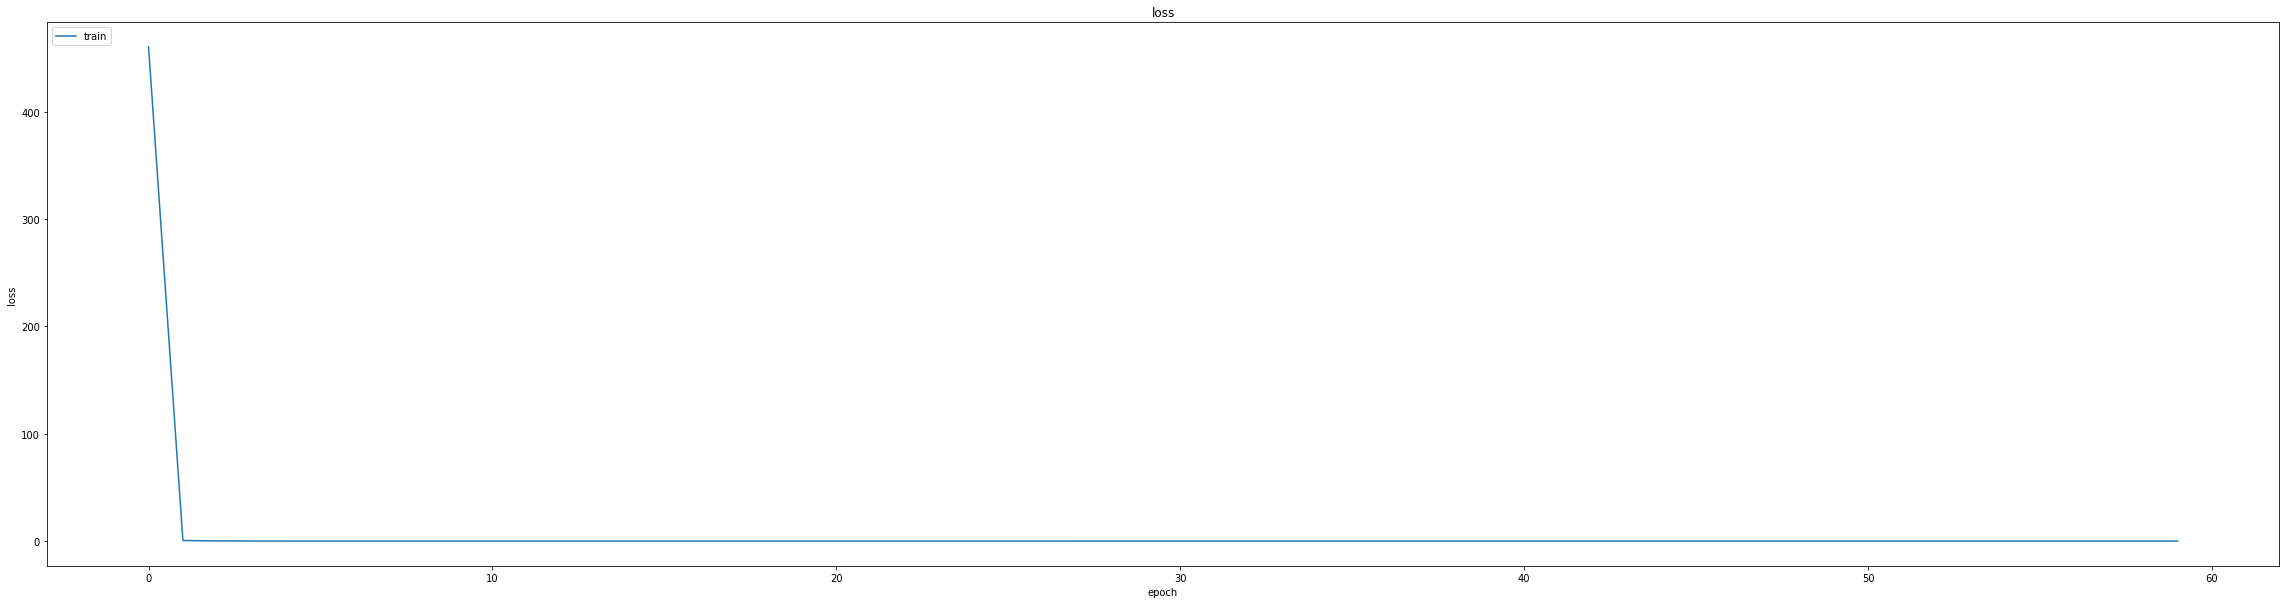

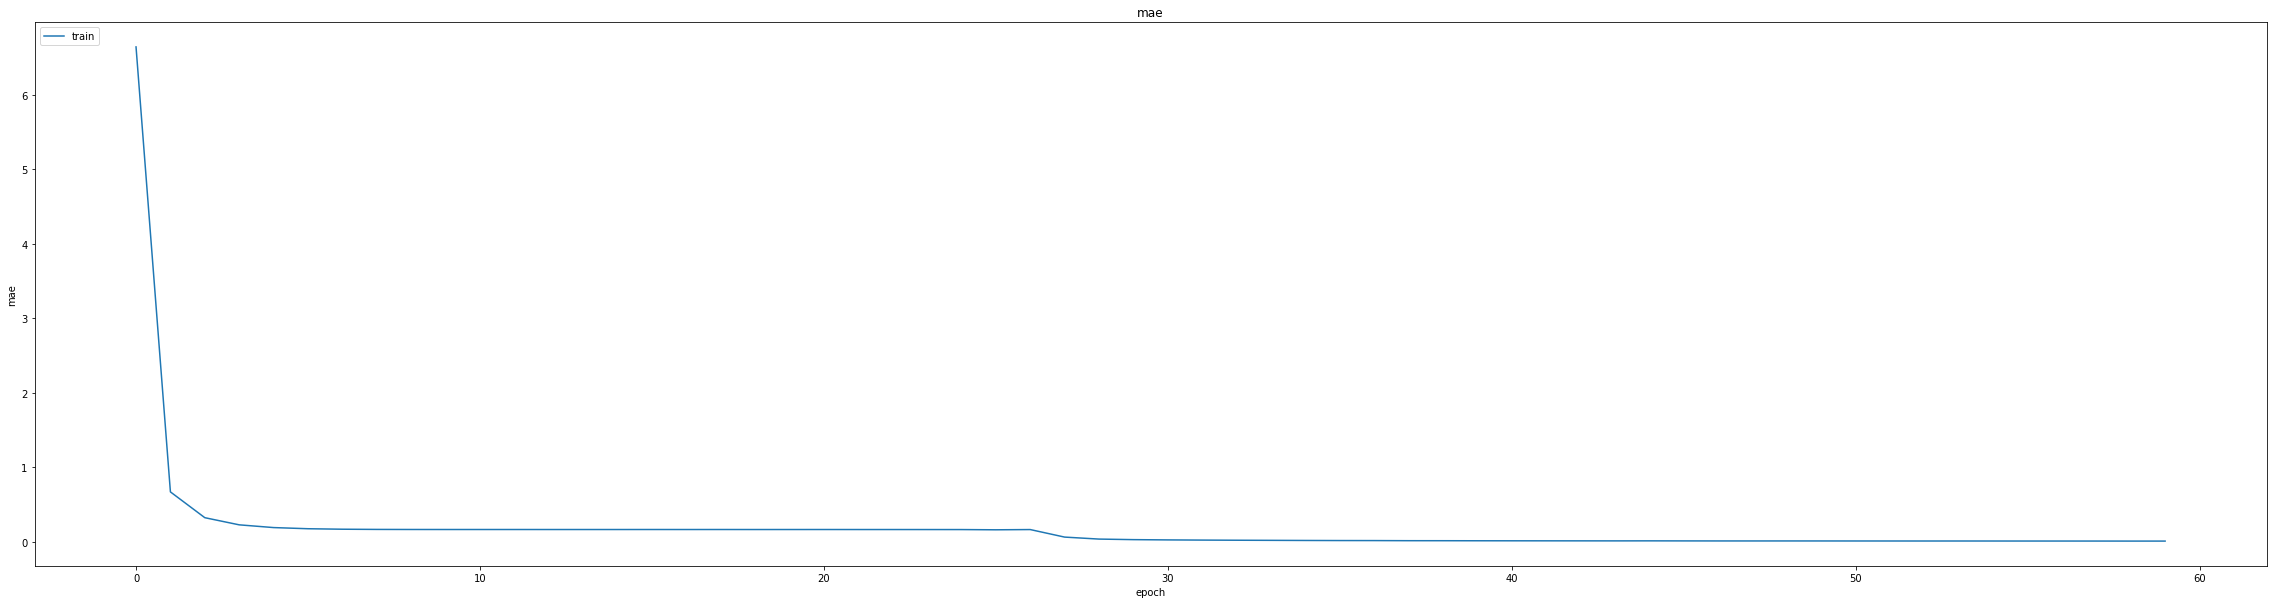

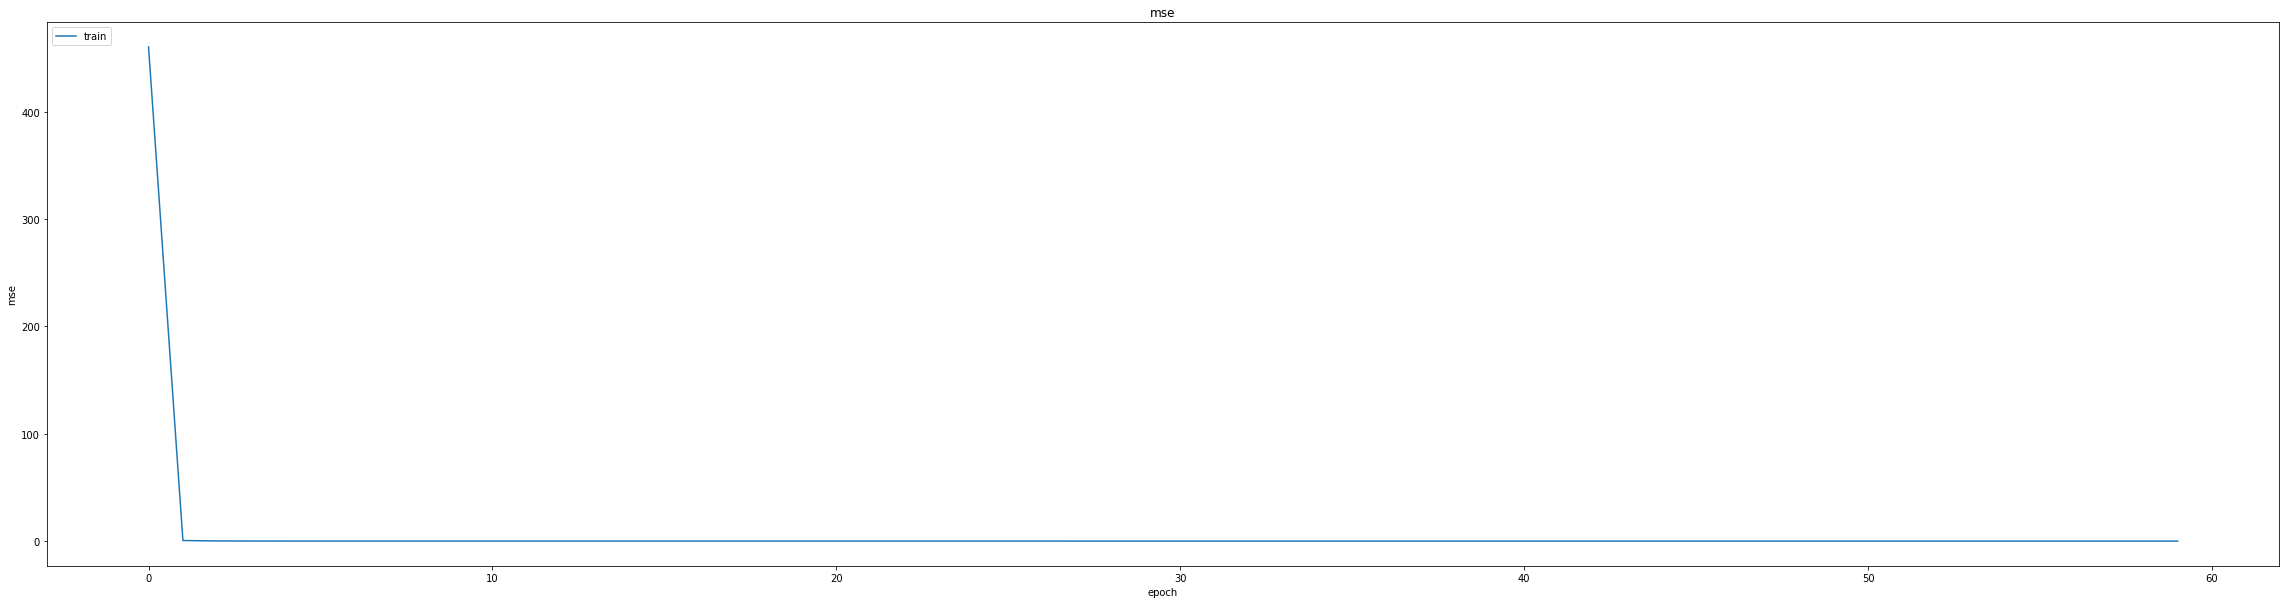

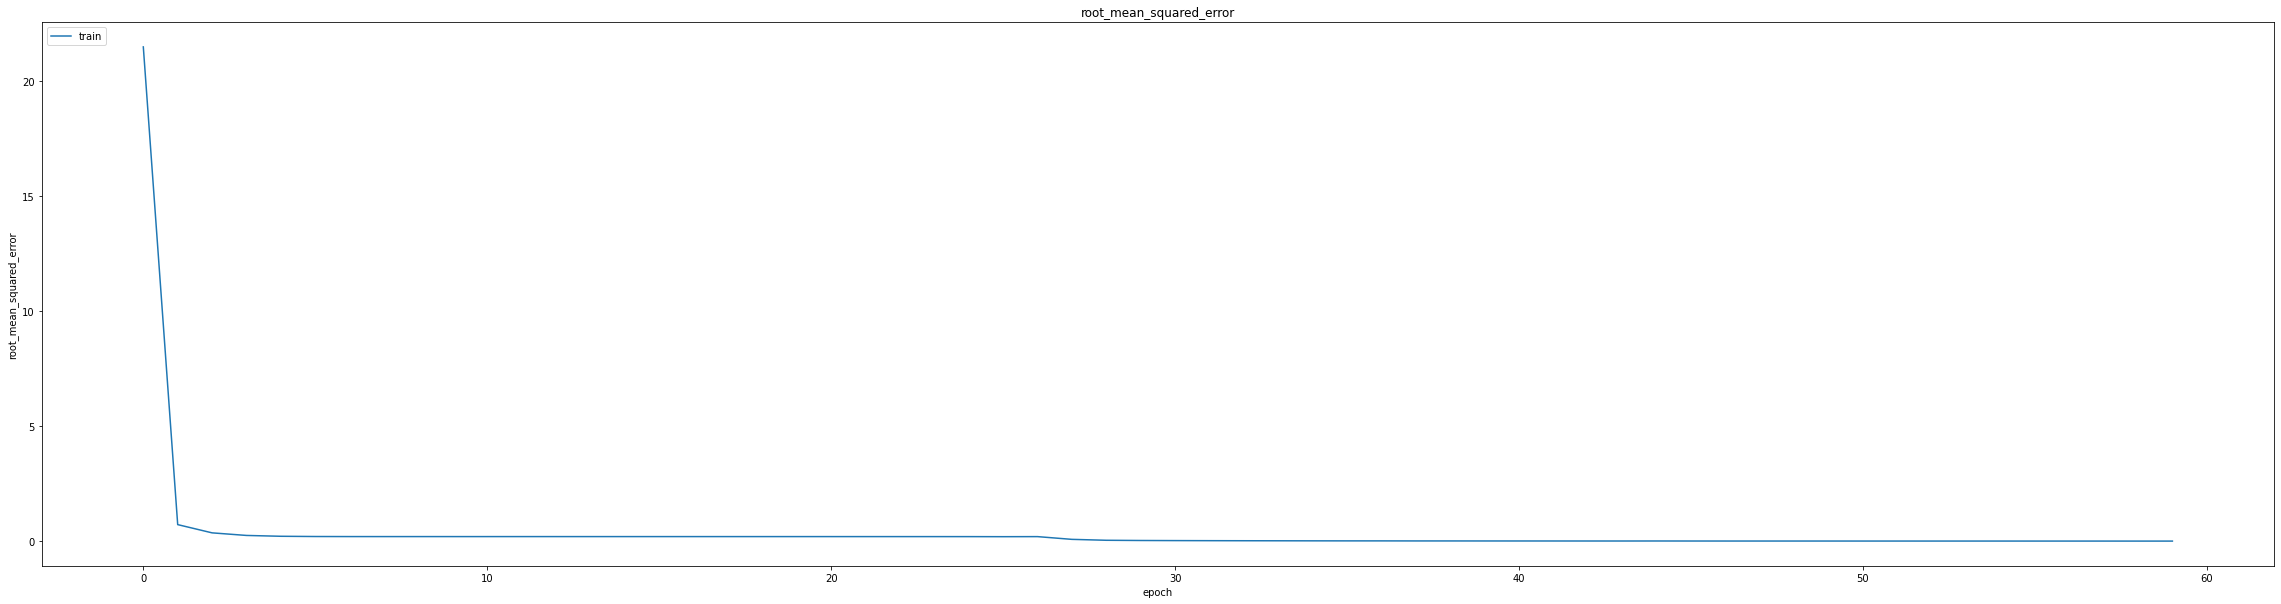

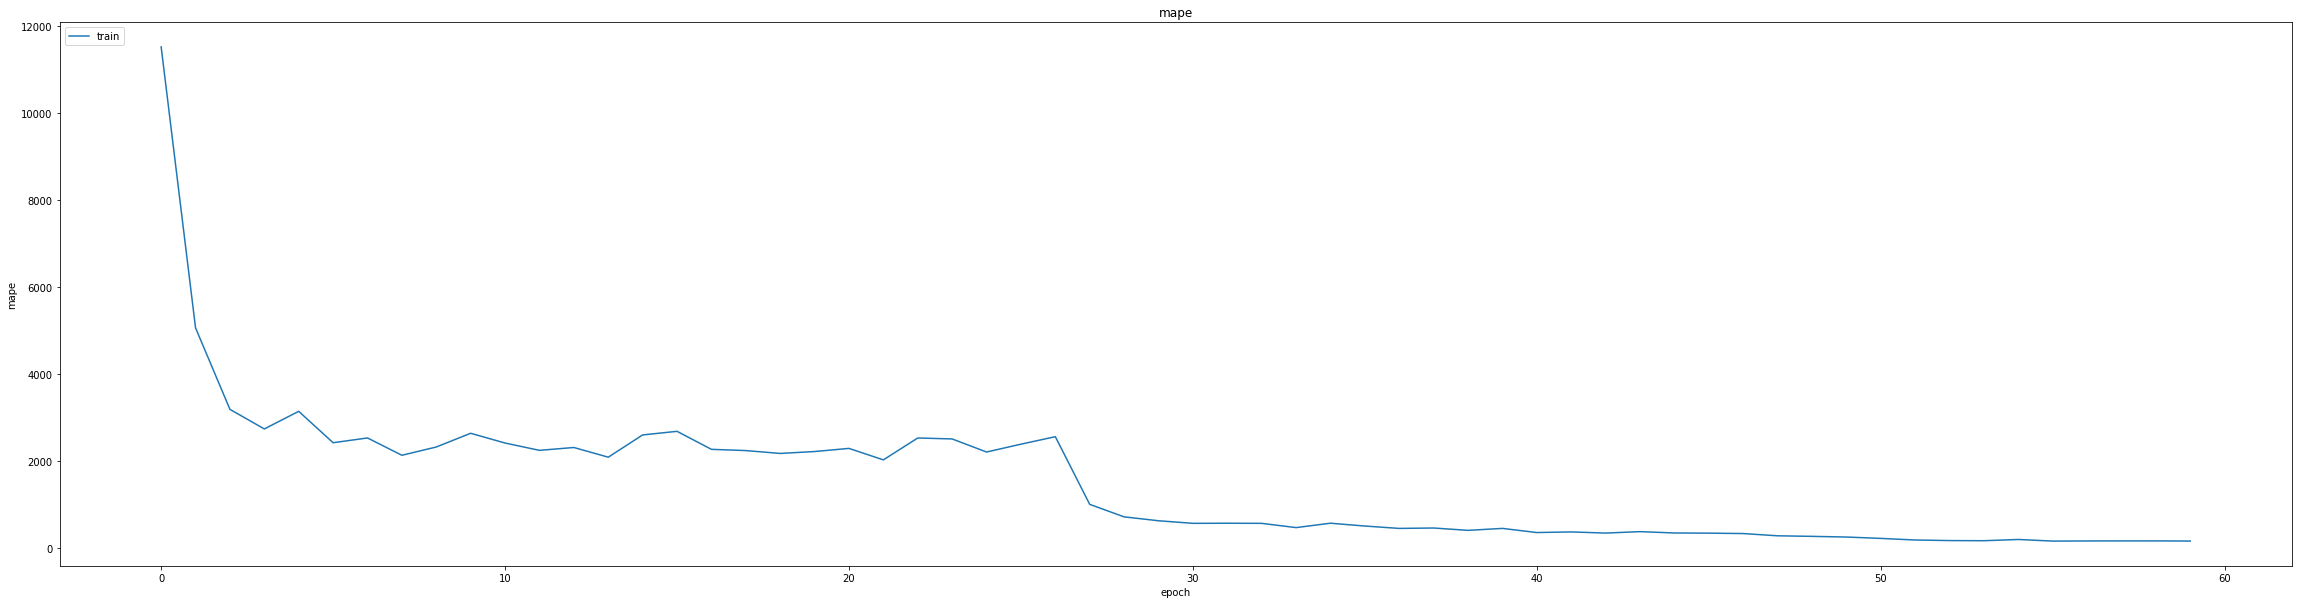

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.015285588800907135
0.02145303413271904
687/687 [==============================] - 27s 36ms/step
0.9784386241554707


In [ ]:
early_stopping = EarlyStopping(monitor='val_mse', patience=12)

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM.hdf5")

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
463/463 [==============================] - ETA: 0s - loss: 0.0013 - mae: 0.0148 - mse: 0.0013 - root_mean_squared_error: 0.0360 - mape: 237.9515
Epoch 1: val_mse did not improve from 0.00046
463/463 [==============================] - 292s 616ms/step - loss: 0.0013 - mae: 0.0148 - mse: 0.0013 - root_mean_squared_error: 0.0360 - mape: 237.9515 - val_loss: 0.0012 - val_mae: 0.0293 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0348 - val_mape: 2198.3372 - lr: 0.0010
Epoch 2/20
463/463 [==============================] - ETA: 0s - loss: 9.5766e-05 - mae: 0.0074 - mse: 9.5766e-05 - root_mean_squared_error: 0.0098 - mape: 231.4384
Epoch 2: val_mse did not improve from 0.00046
463/463 [==============================] - 283s 611ms/step - loss: 9.5766e-05 - mae: 0.0074 - mse: 9.5766e-05 - root_mean_squared_error: 0.0098 - mape: 231.4384 - val_loss: 7.2959e-04 - val_mae: 0.0213 - val_mse: 7.2959e-04 - val_root_mean_squared_error: 0.0270 - val_mape: 2107.0964 - lr: 0.0010
lr changed

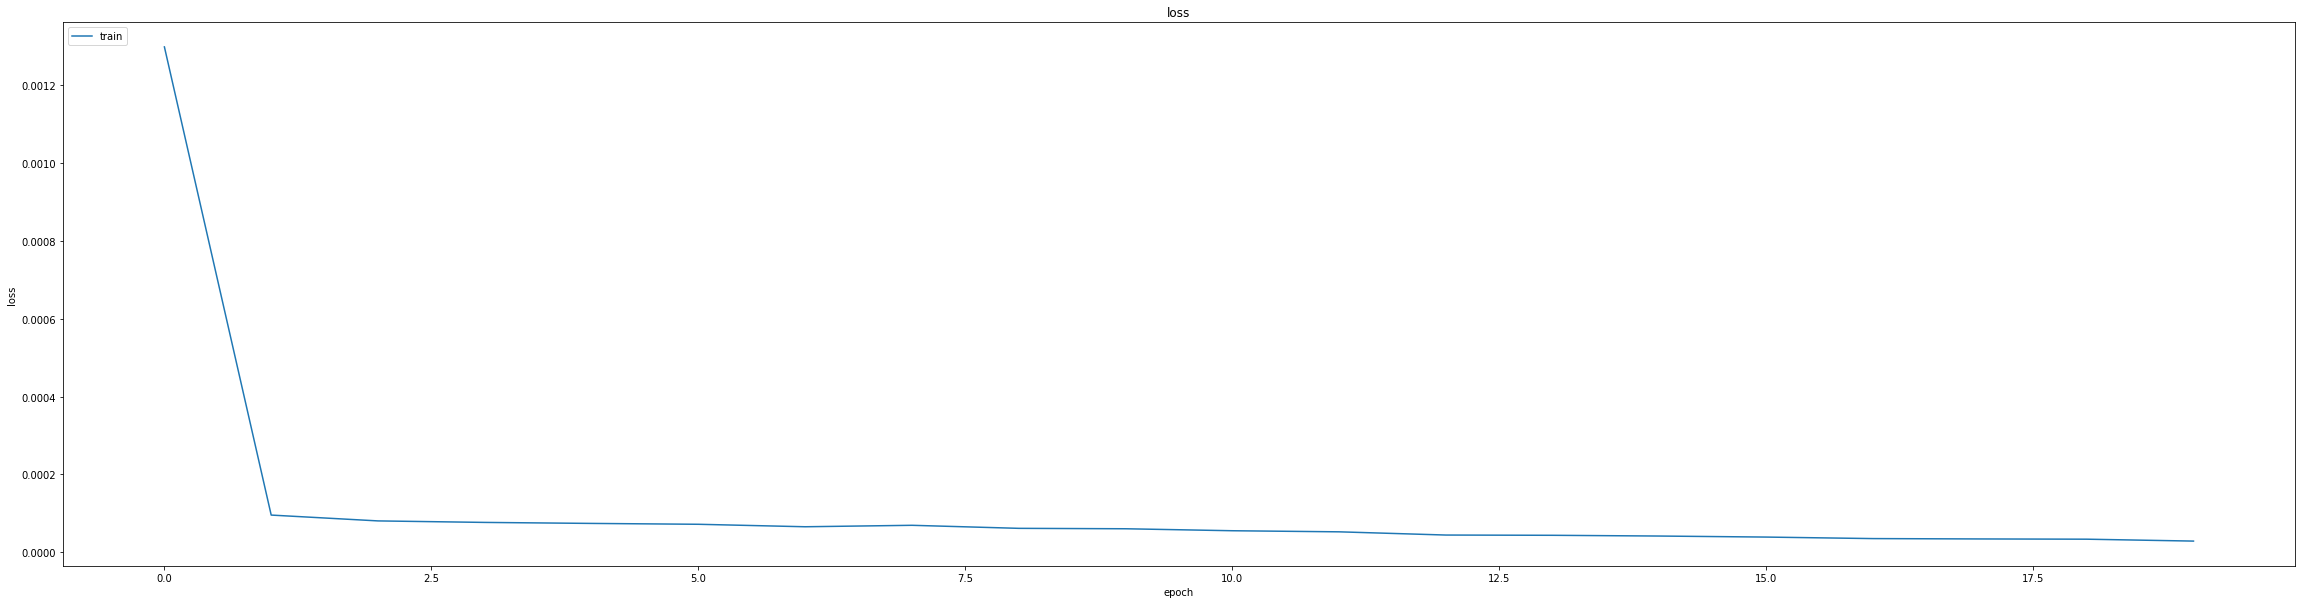

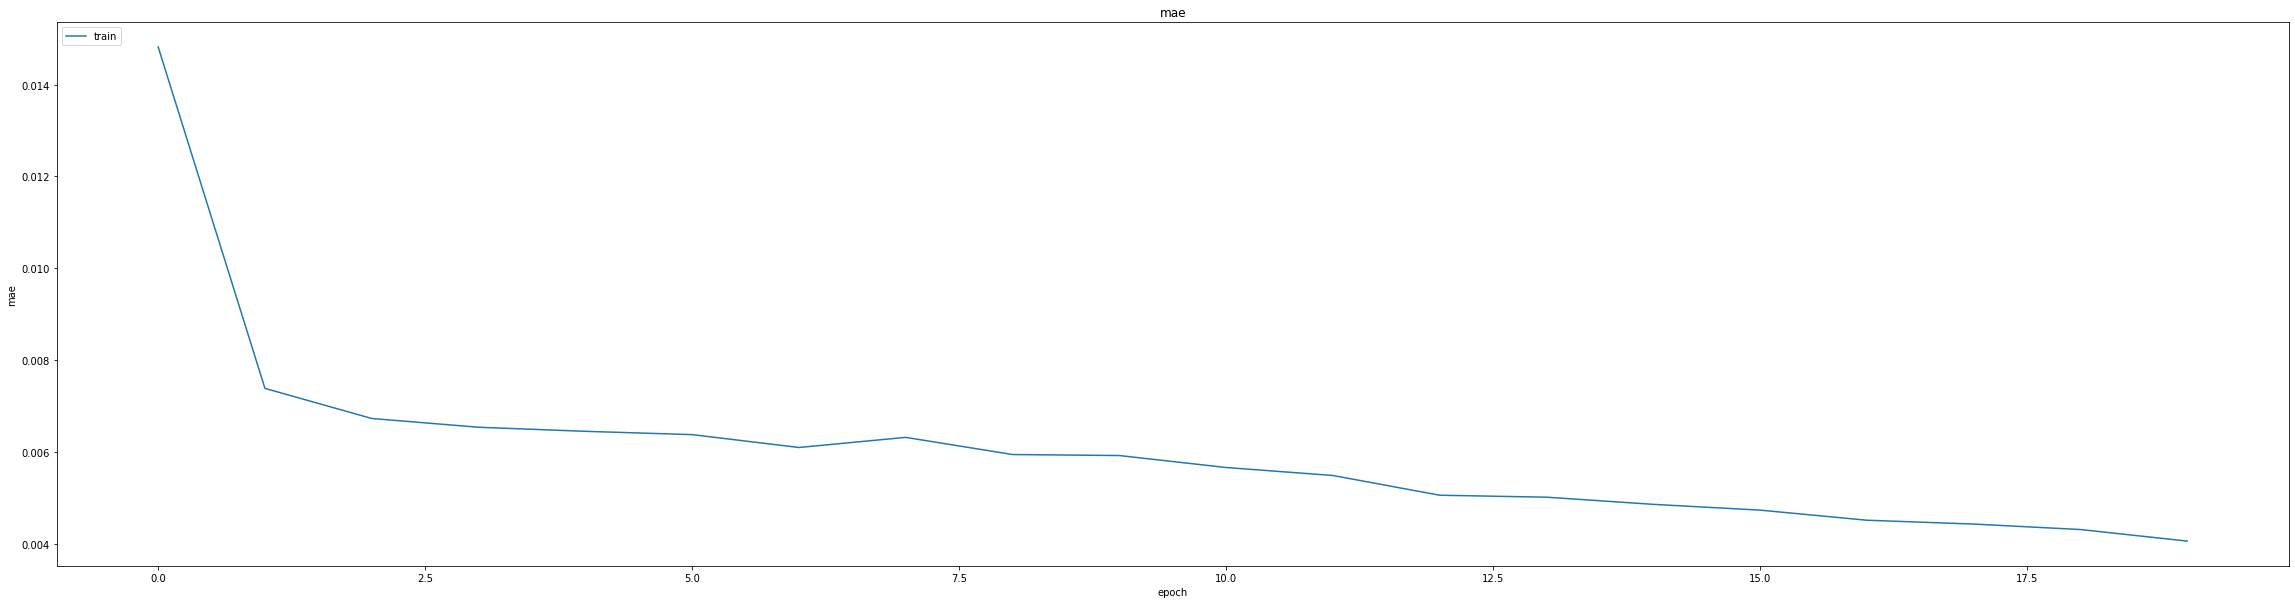

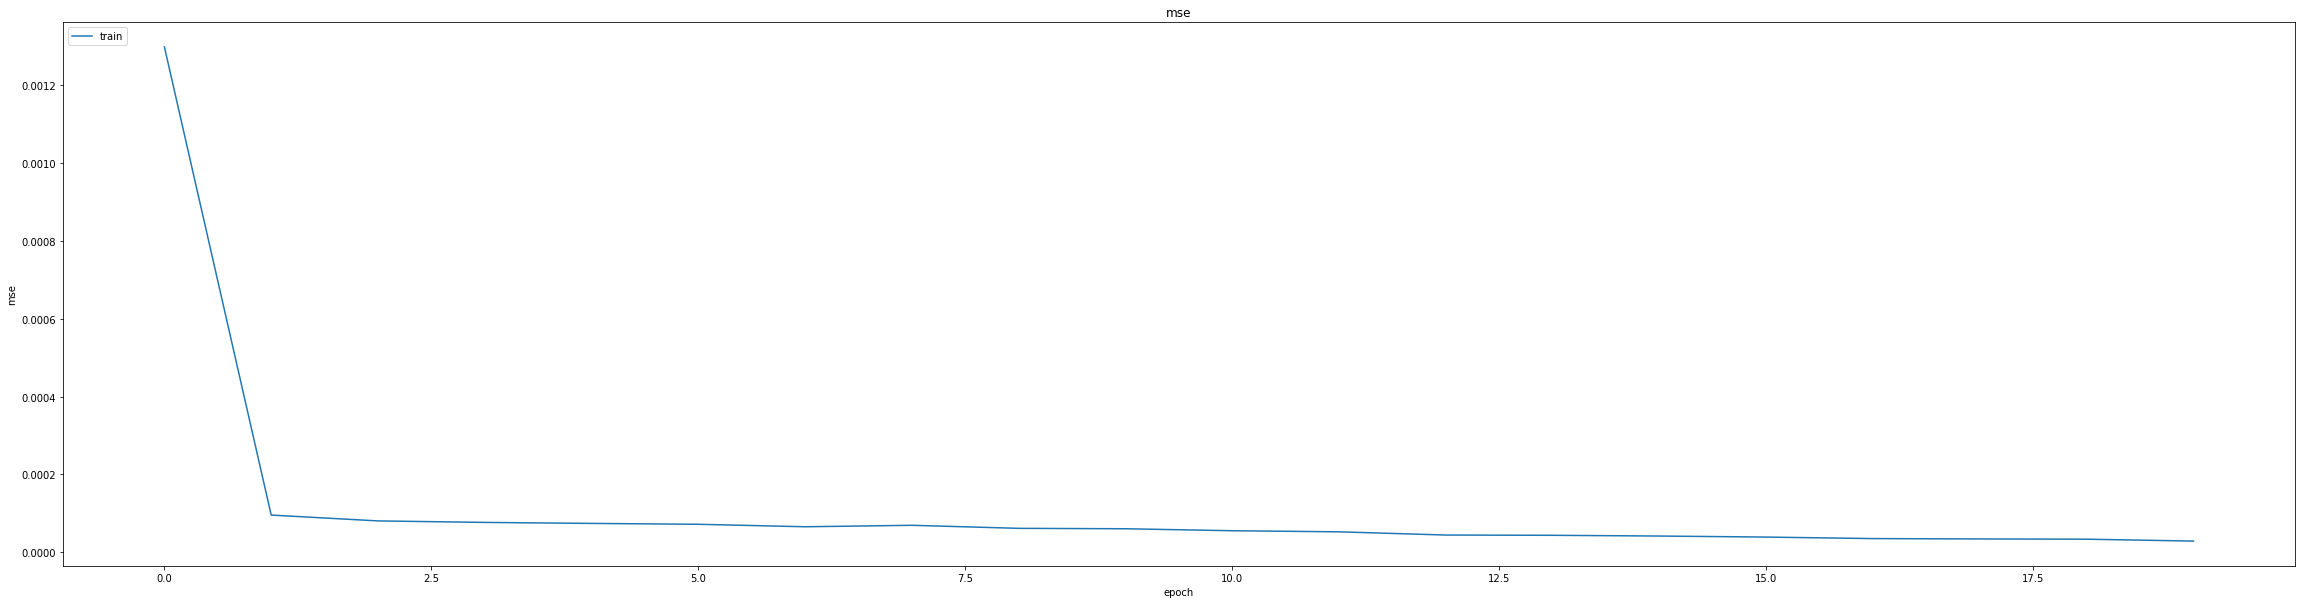

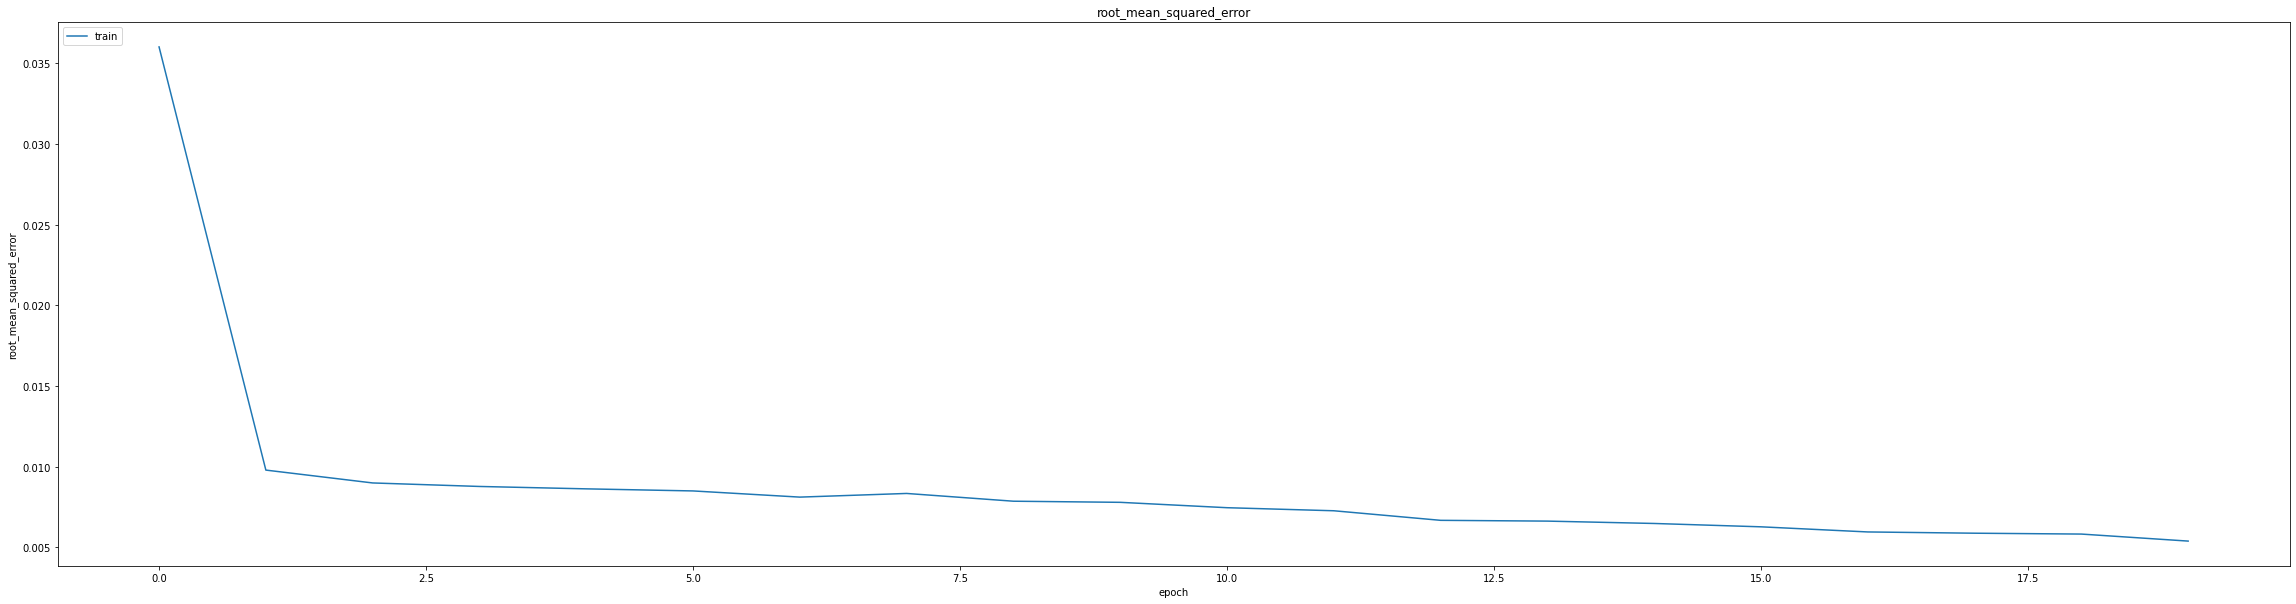

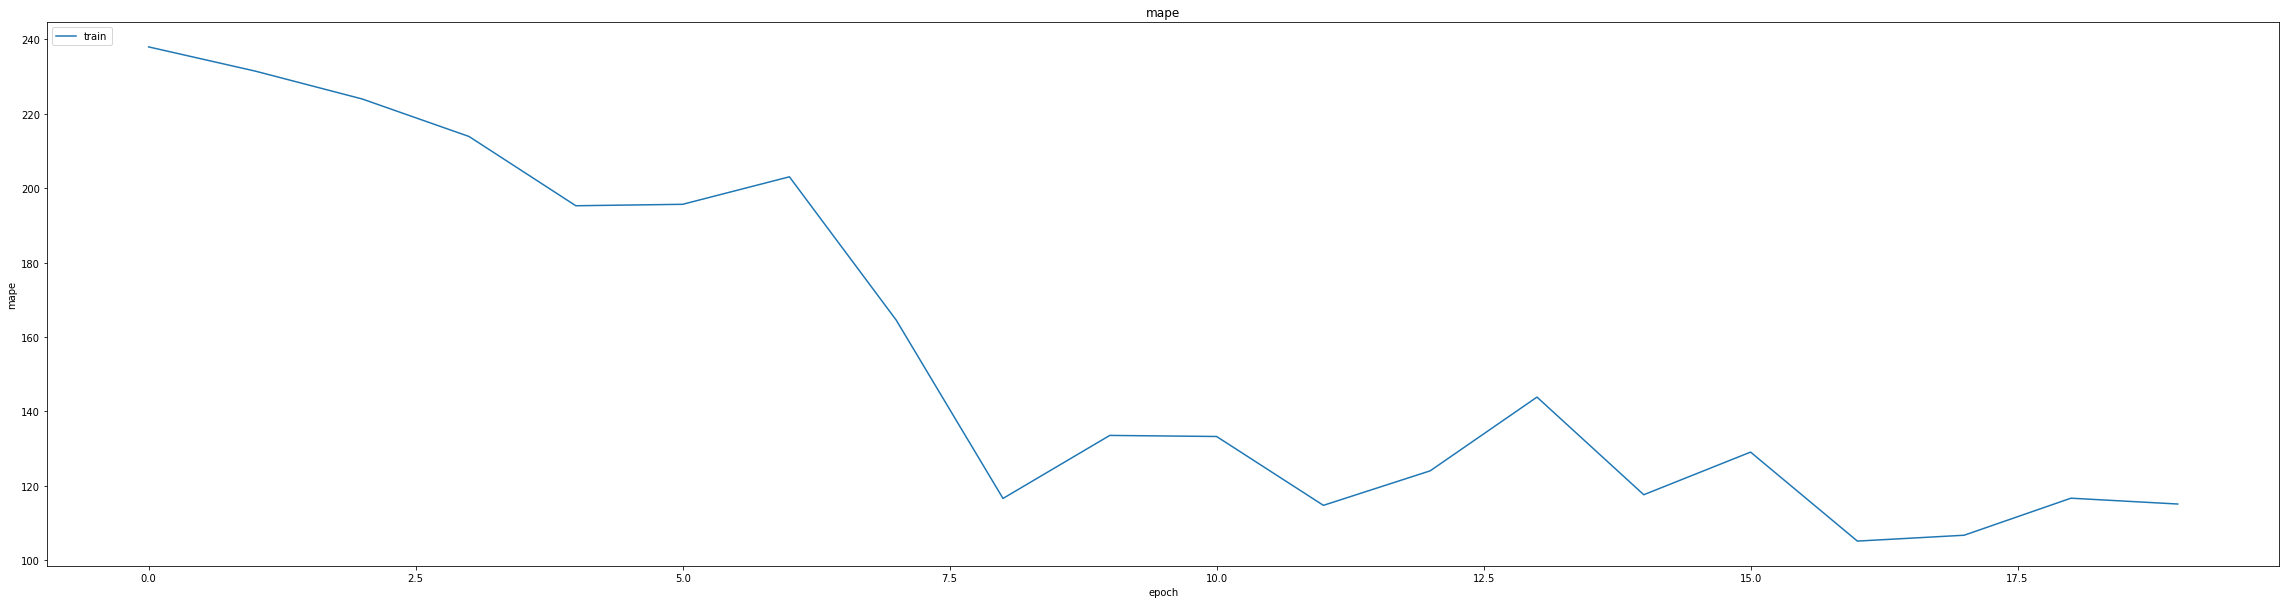

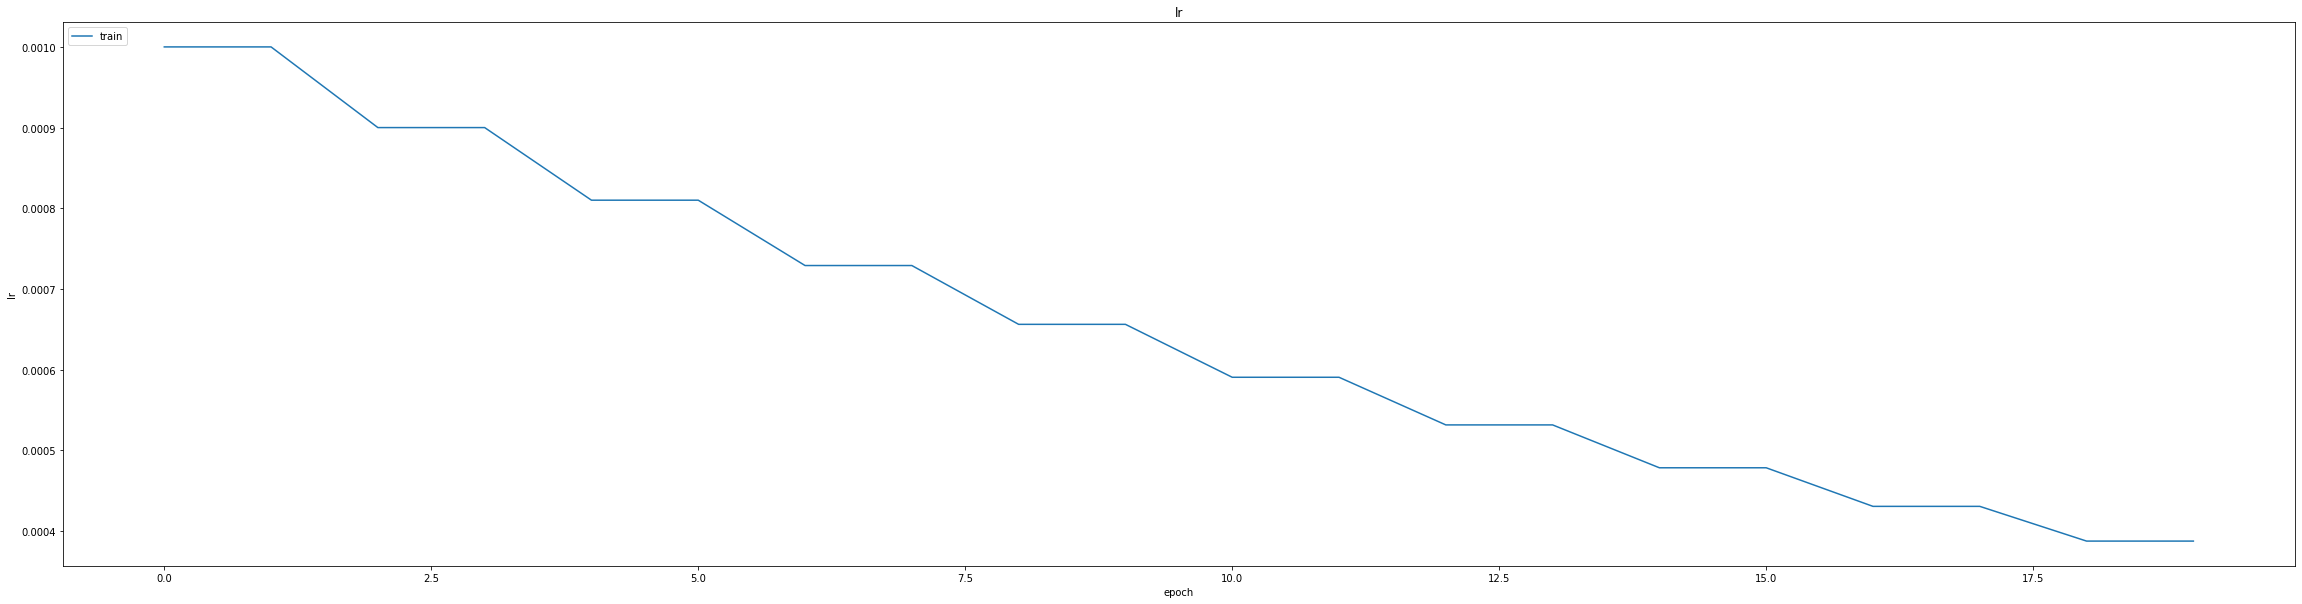

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.012660098262131214
0.016940711066126823
687/687 [==============================] - 44s 62ms/step
0.9649976982829773


687/687 [==============================] - 26s 38ms/step


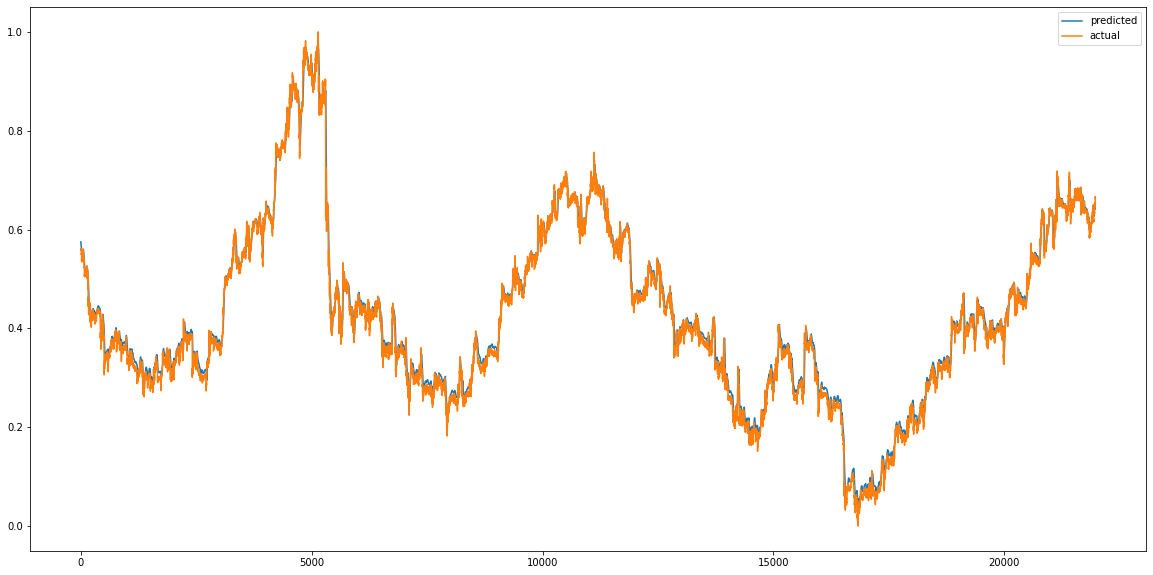

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


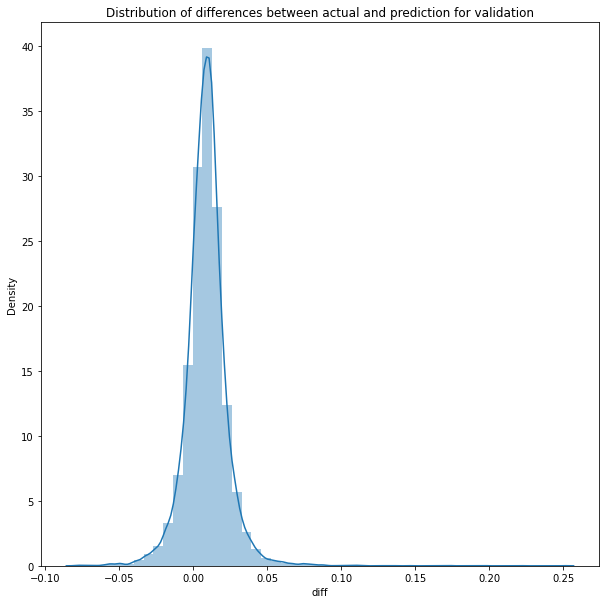

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

702/702 [==============================] - 26s 38ms/step


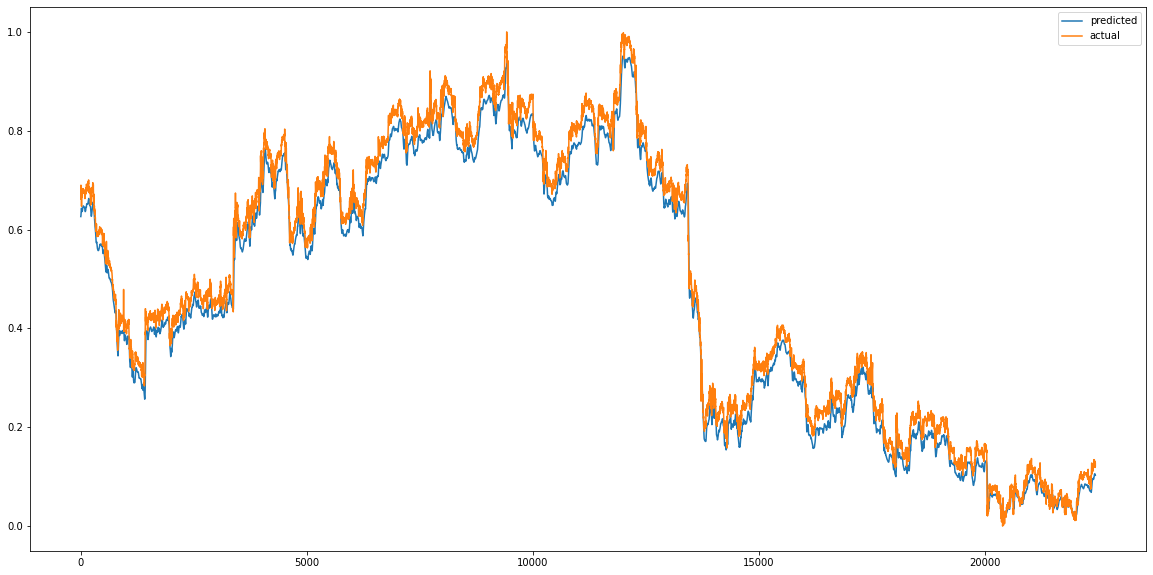

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


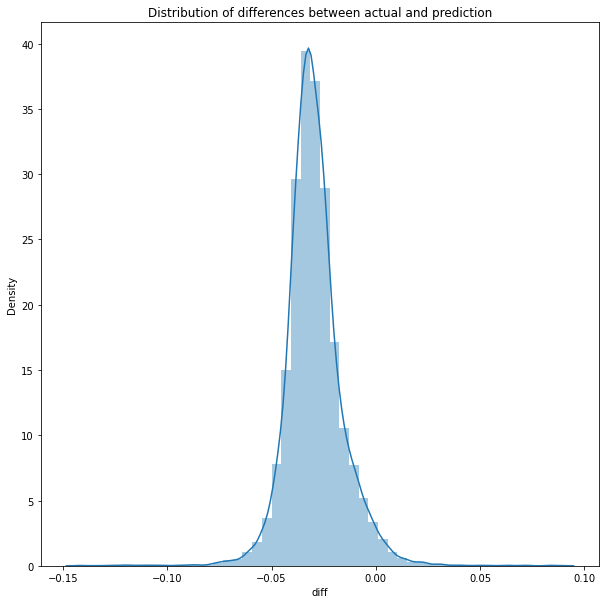

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0010557449773864545
MAE :  0.03003721996359016
RMSE  : 0.032492229492394865
702/702 [==============================] - 29s 41ms/step
R2_Score  : 0.9864669116998559


count    22452.000000
mean        -0.029468
std          0.013690
min         -0.142996
25%         -0.037066
50%         -0.030644
75%         -0.023110
max          0.089380
Name: diff, dtype: float64